<a href="https://colab.research.google.com/github/karimdanish/wordcloud_immigration_canada/blob/main/word_cloud_dfCanada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Creating Word Cloud of the Immigration to Canada**

# **Downloading and Prepping Data**

The first thing we will do is install openpyxl, a module *pandas* require to read Excel files.

In [14]:
import openpyxl

Import primary libraries.

In [15]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays

Download the Canadian Immigration dataset and read into pandas dataframe.

In [23]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'

df_can = pd.read_excel(
    URL,
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Let's view the data.

In [24]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Print the dimensions of the datframe.

In [26]:
df_can.shape

(195, 43)

Clean up the data. We will make some modifications to the original dataset to make it easier for visualization.

In [27]:
# clean up the dataset to remove the unneccessary columns. (eg: Reg)
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis = 1, inplace = True)

# let's rename the columns so that they make sense.
df_can.rename(columns = {'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region'}, inplace=True)

# for the sake of consistency let's make all the column names strings.
df_can.columns = list(map(str, df_can.columns))

# set the country name as index, useful for using .loc method.
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

# make a list of the years in the dataframe, useful for plotting later
years = list(map(int, range(1980, 2014)))

# now check the data dimensions
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


<ipython-input-27-1fd894578259>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


# **Word Cloud**
Now it's time to see the magic of wordcloud module.

In [28]:
# import the neccessary modules

from wordcloud import WordCloud, STOPWORDS
print('wordcloud is imported')


wordcloud is imported


Total Immigration from 1980 - 2013

In [29]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

Using countries with single-word names.

In [31]:
max_words = 90
word_string = ''
for country in df_can.index.values:
    # check if country's name is a single-word name
    if country.count(" ") == 0:
        repeat_num_times = int(df_can.loc[country, 'Total'] / total_immigration * max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)

# display the generated text
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [32]:
# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

In [33]:
# display the cloud
import matplotlib.pyplot as plt

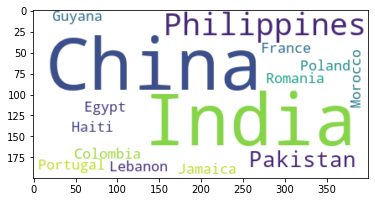

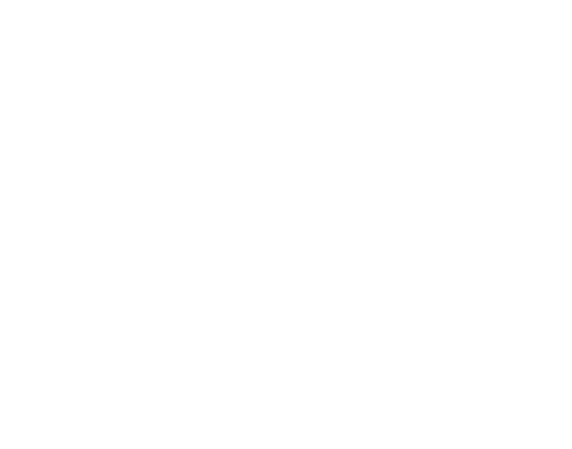

In [37]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.show()